<a href="https://colab.research.google.com/github/lima-breno/data_vizualization/blob/main/DV_04_1_DESAFIO_Gr%C3%A1ficos_de_composi%C3%A7%C3%A3o_e_relacionamento_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Definindo paletas de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

# Aula 01
Vamos praticar a criação de gráficos de composição para a proporção de dados que aprendemos até aqui. Para a prática, vamos seguir utilizando o conjunto de dados do PIB em relação aos Estados do Brasil durante o período de 2002-2020 que está disponível no GitHub do projeto.

## Desafio 01
Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.3 Data Visualization: Gráficos de Composição e Relacionamentos/Dados utilizados/pib_br_2002_2020_estados.csv")
df.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_servicos = df.copy()
df_servicos = df_servicos.query("ano == 2018")[["regiao", "va_servicos"]]
df_servicos = df_servicos.groupby("regiao").sum()
df_servicos = df_servicos.sort_values("va_servicos", ascending= False)

df_servicos

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


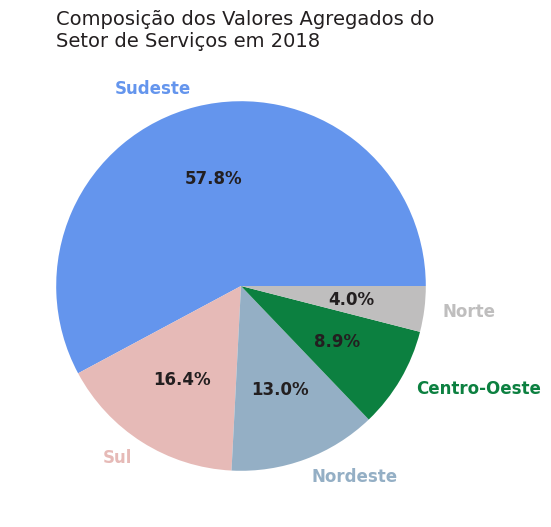

In [ ]:
# Gerando o gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))

#Definindo as cores do grafico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE1, CINZA5]

#personalizando o gráfico
ax.set_title('Composição dos Valores Agregados do \nSetor de Serviços em 2018', fontsize =14, ha='left', color =CINZA1, x=0.1)

#Gerando o gráfico de pizza
ptc, text, _ = ax.pie(data=df_servicos, x='va_servicos', labels = df_servicos.index,
                      autopct='%.1f%%', pctdistance=0.6, colors = cores,
                      textprops = {"size": 12,"fontweight": "bold", "color": CINZA1})

#Ajustando as cores das regioes relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

## Desafio 02
Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [ ]:
df_agreg = df.copy()

#Criando dois dfs com os dados desejados
df_n_2010 = df_agreg.query('ano ==2010')[['regiao', 'va_industria']]
df_n_2020 = df_agreg.query('ano ==2020')[['regiao', 'va_industria']]

#Renomeando todas as regioes exceto no Norte
df_n_2010.loc[df_n_2010['regiao'] != 'Norte','regiao'] = 'Outros estados'
df_n_2020.loc[df_n_2020['regiao'] != 'Norte','regiao'] = 'Outros estados'

#Agrupando os dfs
df_n_2010 = df_n_2010.groupby("regiao").sum()
df_n_2020 = df_n_2020.groupby("regiao").sum()

display(df_n_2010, df_n_2020)


,va_industria
regiao,
Norte,58665438171
Outros estados,845492561850


,va_industria
regiao,
Norte,137740478879
Outros estados,1346596521109


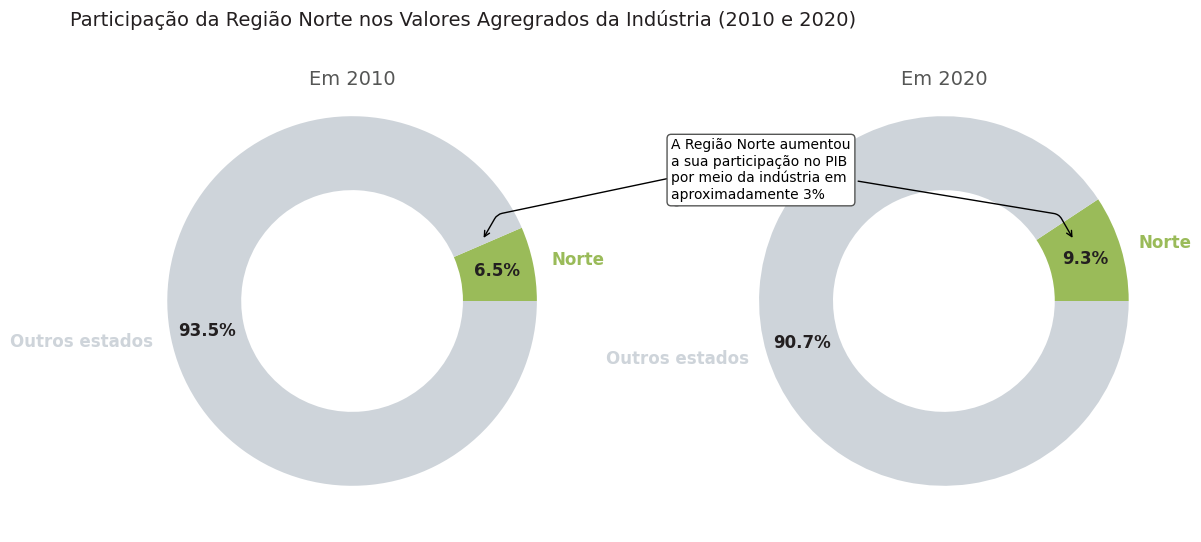

In [ ]:
# Gerando o gráfico

fig, axs = plt.subplots(1,2, figsize=(14,6))

#Definindo as cores
cores = [VERDE2, CINZA6]

#Personalizando o gráfico
plt.suptitle('Participação da Região Norte nos Valores Agregrados da Indústria (2010 e 2020)',
             fontsize=14, color=CINZA1, ha = 'left', x = 0.1)

# GRÁFICO 1 - Valores Agregados Norte x Outros em 2010
ptc, text, _ = axs[0].pie(data = df_n_2010, x = "va_industria", labels = df_n_2010.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight":"bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors = cores)
# Título do Gráfico 1
axs[0].set_title('Em 2010', fontsize=14, color=CINZA3, y = 0.95)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# GRÁFICO 2 - Valores Agregados Norte x Outros em 2020
ptc, text, _ = axs[1].pie(data = df_n_2020, x = "va_industria", labels = df_n_2020.index, autopct="%.1f%%",
                          pctdistance=0.8, textprops={"size": 12, "fontweight":"bold", "color": CINZA1},
                          wedgeprops=dict(width=0.4), colors = cores)

# Título do Gráfico 2
axs[1].set_title('Em 2020', fontsize=14, color=CINZA3, y = 0.95)

# Ajustando as cores das regiões relativas as fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

#######################################

# Anotações do gráfico
axs[0].annotate('\n\n\n', xy=(260, 210), xycoords='axes points', xytext=(400, 240), textcoords='axes points',            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=60,armA=30,armB=30,rad=5"))

axs[1].annotate('A Região Norte aumentou\na sua participação no PIB\npor meio da indústria em\naproximadamente 3%', xy=(260, 210), xycoords='axes points', xytext=(-30, 240), textcoords='axes points', bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10, arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5"))

plt.show()


#Aula 02
Vamos praticar a criação de gráficos de composição para investigar a acumulação ou subtração de valores de um total. Para a prática, vamos seguir utilizando o conjunto de dados do PIB em relação aos Estados do Brasil durante o período de 2002-2020 que está disponível no GitHub do projeto.

##Desafio 01
Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [ ]:
# Criando um df com os dados de SP em 2020
sp = df.query("sigla_uf == 'SP' and ano == 2020")[['va', 'impostos_liquidos','pib']]
sp.rename(columns = {'va': 'Valor agregado bruto de bens e serviços', 'impostos_liquidos':'Impostos Liquídos', 'pib':'PIB'}, inplace= True)
sp

,Valor agregado bruto de bens e serviços,Impostos Liquídos,PIB
379,2014850308310,362788671543,2377638979835


In [ ]:
#Transportando as linhas para colunas
sp = sp.melt(var_name = "Indicadores", value_name = "Valores")
sp

,Indicadores,Valores
0,Valor agregado bruto de bens e serviços,2014850308310
1,Impostos Liquídos,362788671543
2,PIB,2377638979835


In [ ]:
#Passando para Bilhoes
sp['Valores_str'] = (sp['Valores']/1e12).map('R$ {:,.3}Tri'.format)
sp["Medidas"] = ['absolute','relative', 'total']
sp

,Indicadores,Valores,Valores_str,Medidas
0,Valor agregado bruto de bens e serviços,2014850308310,R$ 2.01Tri,absolute
1,Impostos Liquídos,362788671543,R$ 0.363Tri,relative
2,PIB,2377638979835,R$ 2.38Tri,total


In [ ]:
# Gerando o gráfico de cascata
import plotly.graph_objects as go
fig = go.Figure( go.Waterfall(name = "", measure = sp["Medidas"],
                             x = sp["Indicadores"],  y = sp["Valores"],
                             text = sp["Valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA4),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1)
                             )
              )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family = 'DejaVu Sans', font_size=14,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=18,
                  title_text='Composição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                             f'<br><sup size=1 style="color:{CINZA3}">Em trilhões de reais</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,2.6e12], hovermode="closest")

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.show()


##Desafio 02
Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?

In [ ]:
# Importando as bibliotecas
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Importando a base de dados do PIB de 2002 a 2020
df_ne = df.copy()

# Criando um df com os dados desejados
anos = [x for x in range(2016, 2021)]
df_ne = df_ne.query("regiao == 'Nordeste' and ano == @anos")[["ano","va_servicos"]]
df_ne = df_ne.groupby("ano").sum().reset_index()

# Gerando a coluna com a variação do valor agregado da indústria
# e passando o valor inicial para a 1ª linha da variação
df_ne["variacao_servicos"] = df_ne["va_servicos"].diff().fillna(df_ne["va_servicos"]).astype("int64")

# Gerando uma coluna com as Medidas para o gráfico de cascata
df_ne["Medidas"] = ["absolute"] + ["relative"] * 4

# Gerando uma observação com a atualização da última linha com o PIB total de 2020
linha = pd.Series({'ano': 'Total',
                   'va_servicos': df_ne["va_servicos"].values[-1],
                   'variacao_servicos': df_ne["va_servicos"].values[-1],
                   'Medidas': "total"}).to_frame().T

# Concatenando o df com a atualização e retirando a coluna pib
df_ne = pd.concat([df_ne, linha], axis = 0, ignore_index=True)
df_ne = df_ne.drop(columns=["va_servicos"])

# Criando uma coluna com os valores em string
df_ne["variacao_servicos_texto"] = (df_ne["variacao_servicos"]/1e9).map('R$ {:,.2f} Bi'.format)

df_ne


,ano,variacao_servicos,Medidas,variacao_servicos_texto
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [ ]:
# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", measure = df_ne["Medidas"], y = df_ne["variacao_servicos"],
                              text = df_ne["variacao_servicos_texto"], textposition = "outside",
                              connector_line = dict(color = CINZA3),
                              totals_marker = dict(color = AZUL3),
                              increasing_marker = dict(color = VERDE1),
                              decreasing_marker = dict(color = VERMELHO1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family = 'DejaVu Sans', font_size=12,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=18,
                  title_text='Variação do Valor Agregado de Serviços no Nordeste' +
                             f'<br><sup size=1 style={CINZA3}>De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,500e9])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,6), ticktext=df_ne["ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="No período destacado, <b>apenas</b><br>no ano de 2020 houve recuo do<br>valor agregado do <b>setor de<br>serviços</b> na região Nordeste",
                   align="left", axref = 'x', ayref='y', x=4, y=390e9, ax=3, ay=250e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)

fig.show()


#Aula 03
Vamos praticar a criação de gráficos de composição para poucos períodos, comparando os intervalos. Para a prática, vamos seguir utilizando o conjunto de dados do PIB em relação aos Estados do Brasil durante o período de 2002-2020 que está disponível no GitHub do projeto.

##Desafio 01
Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?

In [ ]:
df.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

#Selecionando os dados
df_reg = df.copy()

# Criando um df com os dados desejados
anos = [x for x in range(2017,2021)]
df_reg = df_reg.query("ano == @anos")[["ano","regiao","pib"]]
df_reg["pib"] = (df_reg["pib"] / 1e12).round(2)

# Criando uma tabela cruzada (crosstab) com os valores de cada ano por região
df_reg = pd.crosstab(index = df_reg.ano, columns = df_reg.regiao,
                            values = df_reg.pib, aggfunc = "sum")
df_reg = df_reg[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_reg = df_reg.reset_index()

df_reg


regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


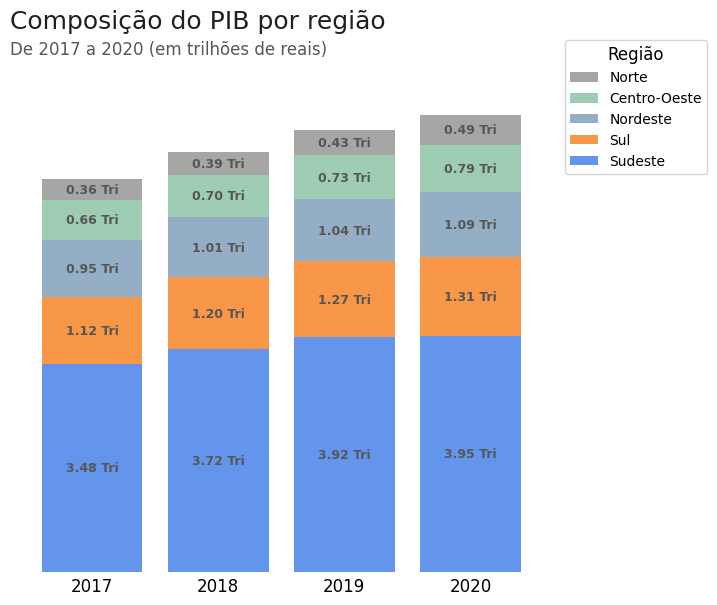

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(7,7))

# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

# Personalizando o título
ax.set_title("Composição do PIB por região", fontsize=18, color=CINZA1, ha = 'left', x=0, transform=ax.transAxes)
ax.text(0, 0.97, "De 2017 a 2020 (em trilhões de reais)", color= CINZA3, fontsize=12, ha='left', va='center', transform=ax.transAxes)

# Construindo o gráfico de colunas empilhadas
df_reg.plot(x = "ano", kind="bar", width=0.8, stacked = True, color = cores, ax = ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2, labelrotation = 0)
ax.set_ylim(0, 9)
ax.set_frame_on(False)

# Adicionar a legenda do lado superior direito
ax.legend(bbox_to_anchor=(1.01, 1), reverse = True, title='Região', title_fontsize  = 12, fontsize = 10)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os valores dentro da coluna
for container in ax.containers:
    labels = [f'{valor.get_height():.2f} Tri' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 9, color = CINZA3, fontweight = "bold")

plt.show()


## Desafio 02
Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Norte no ano de 2020?

In [ ]:
# selecionando os dados
df_n_estados = df.copy()

# Criando um df com os dados desejados
df_n_estados = df_n_estados.query("regiao == 'Centro-Oeste' and ano == 2020")[["sigla_uf","va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_n_estados = df_n_estados.set_index("sigla_uf")
df_n_estados = df_n_estados.sort_values(by="va_servicos", axis=0)

df_n_estados


,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


In [ ]:
# Código para gerar o texto colorido
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


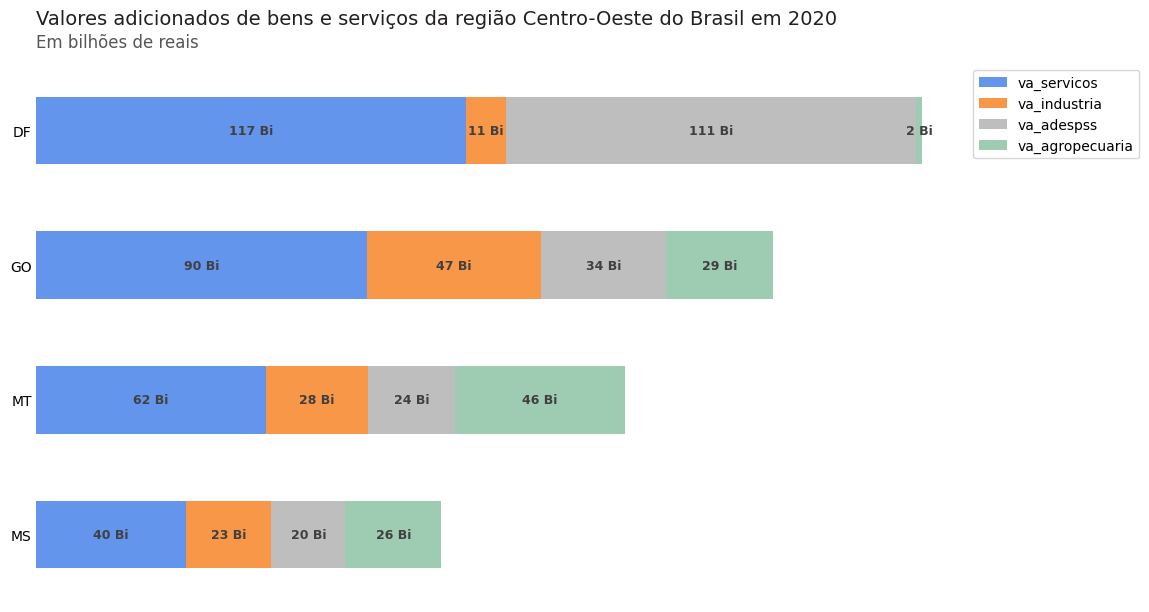

In [ ]:
def grafico_va():
  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(12,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

  # Gerando o gráfico de barras empilhadas 100%
  df_n_estados.plot(kind="barh", stacked=True, color = cores, ax=ax)

  ## Personalizando o gráfico
  plt.suptitle('Valores adicionados de bens e serviços da região Centro-Oeste do Brasil em 2020', size=14,
               color=CINZA1, ha = 'left', x = 0, y = 1.1, transform=ax.transAxes)
  plt.title('Em bilhões de reais', fontsize=12, color=CINZA3, ha = "left", x = 0, y = 1.03, transform=ax.transAxes)
  ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, fontsize = 10, loc='upper left')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, color = CINZA2)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # Valores das barras
  for container in ax.containers:
      labels = [f'{valor.get_width()/1e9:.0f} Bi' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 9, color = CINZA2, fontweight='bold')

  return ax, cores

ax, cores = grafico_va()


# Aula 04
Vamos praticar a criação de gráficos de composição para investigar a variação dos dados para muitos períodos e/ou para pontos específicos ao longo do tempo. Para isso, vamos seguir utilizando o conjunto de dados do PIB em relação aos Estados do Brasil durante o período de 2002-2020 que está disponível no GitHub do projeto.

## Desafio 01
No setor de Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS), como estão distribuídos os valores adicionados por região, em valores relativos, dentro do período da base dos dados (2002 - 2020)?

In [ ]:
df_adesp = df.copy()

df_adesp = df_adesp[['ano', 'regiao', 'va_adespss']]

#Agrupando os dados por regiao
df_adesp = pd.crosstab(index = df_adesp.ano, columns = df_adesp.regiao, values = df_adesp.va_adespss, aggfunc='sum', normalize = 'index')

df_adesp=(df_adesp*100).round(2)

#organizando os dados apenas
df_adesp = df_adesp[['Sudeste', 'Sul','Nordeste', 'Centro-Oeste', 'Norte']]
df_adesp

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


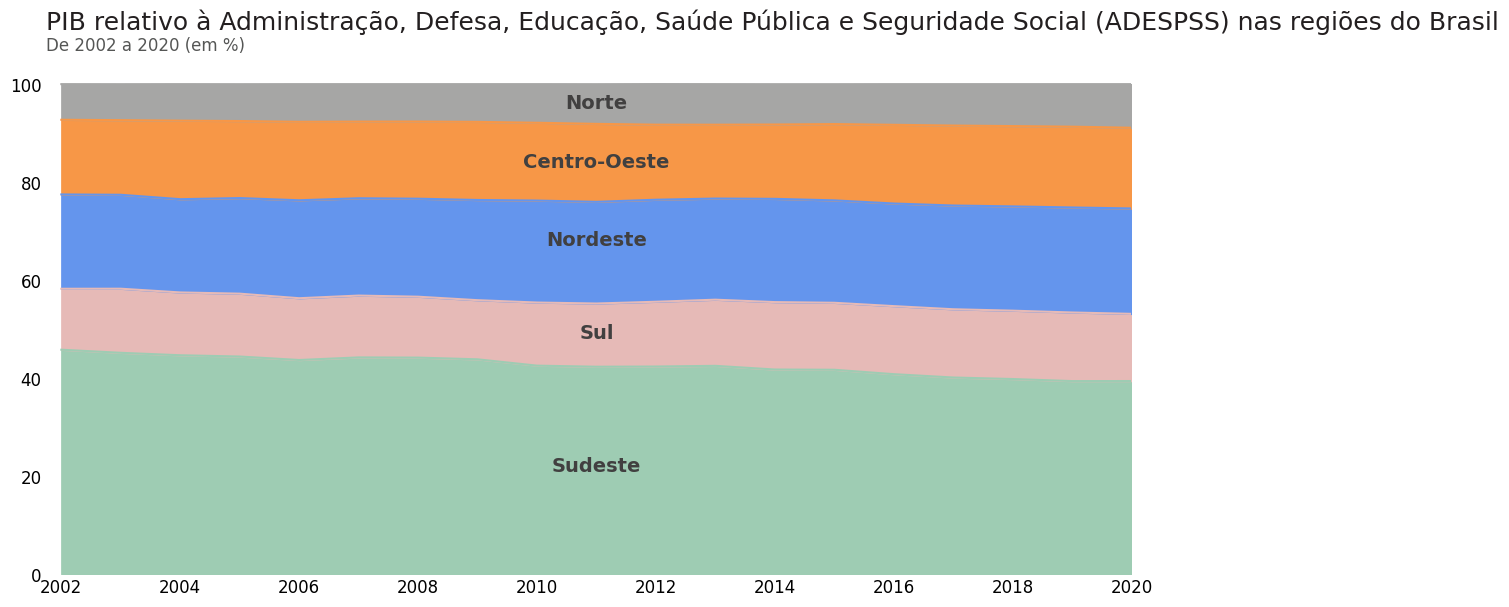

In [ ]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,7))

# Definindo as cores do gráfico
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

# Gerando o gráfico de barras empilhadas 100%
df_adesp.plot(kind ='area',stacked = True, color=cores, ax=ax, xticks=range(2002,2021,2))

## Personalizando o gráfico
ax.set_title('PIB relativo à Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS) nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', x =0, transform=ax.transAxes)
ax.text(0, 0.98, "De 2002 a 2020 (em %)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)

plt.ylim(0,100)
ax.set_ybound(0,110) #ajustando os limites do eixo y
ax.set_xbound(2001.75,2020) #ajustando os limites do eixo x
ax.legend().remove()
ax.set_frame_on(False)

# Destacando os nomes das regições
reg = df_adesp.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(0, len(reg)):
  ax.text(2011, y_pos[i],f'{reg[i]}', color = CINZA2, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

#Desafio 02
Para o segundo desafio, vamos construir um gráfico de inclinação com três períodos de interesse (2010, 2015 e 2020) para a participação do PIB relativo à indústria nas regiões do Brasil. Vamos utilizar axis duplos no eixo y para conseguir editar os pontos e apresentar os dados de maneira direta, apresentando as oscilações nesses únicos pontos.

In [ ]:
df_ind = df.copy()
anos = [x for x in range(2010, 2021,5)]
df_ind = df_ind.query('ano == @anos')[['regiao', 'ano', 'va_industria']]

df_ind = pd.crosstab(index = df_ind.ano, columns = df_ind.regiao, values = df_ind.va_industria, aggfunc='sum', normalize = 'index')
df_ind = (df_ind*100).round(2)

df_pib=df_ind

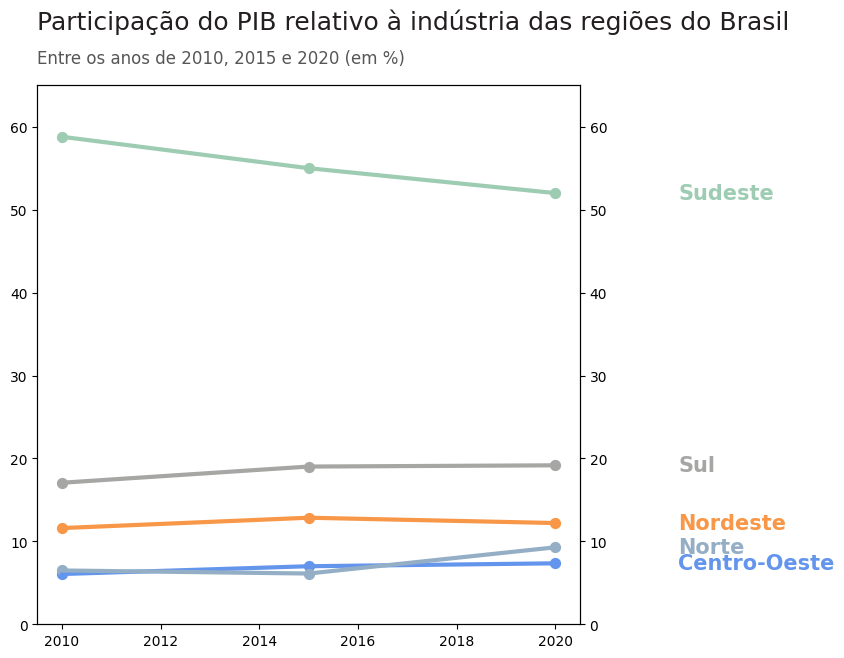

In [ ]:
def grafico_slope_pib():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax1 = plt.subplots(figsize=(7,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

  # Gerando um axis duplo partilhando o eixo x e os mesmos limites em y
  ax2 = ax1.twinx()
  ax1.set_ylim([0,65])
  ax2.set_ylim([0,65])

  # Gerando o gráfico de inclinação (pontos + curva + texto)
  for i in range(5):
    # Adicionando o ponto inicial e final
    ax1.scatter(x = df_pib.index, y = df_pib.iloc[:,i], color = cores[i], s = 50)

    # Adicionando a inclinação
    ax1.plot(df_pib.index, df_pib.iloc[:,i], color = cores[i], lw = 3)

    # Adicionando as regiões no label
    ax1.text(x = 2022.5, y = df_pib.iloc[-1,i], s = df_pib.columns[i],
            fontsize=15, fontweight = 'bold', color=cores[i], va='center')

  ## Personalizando o gráfico
  ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
  ax1.text(0, 1.05, "Entre os anos de 2010, 2015 e 2020 (em %)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_pib()



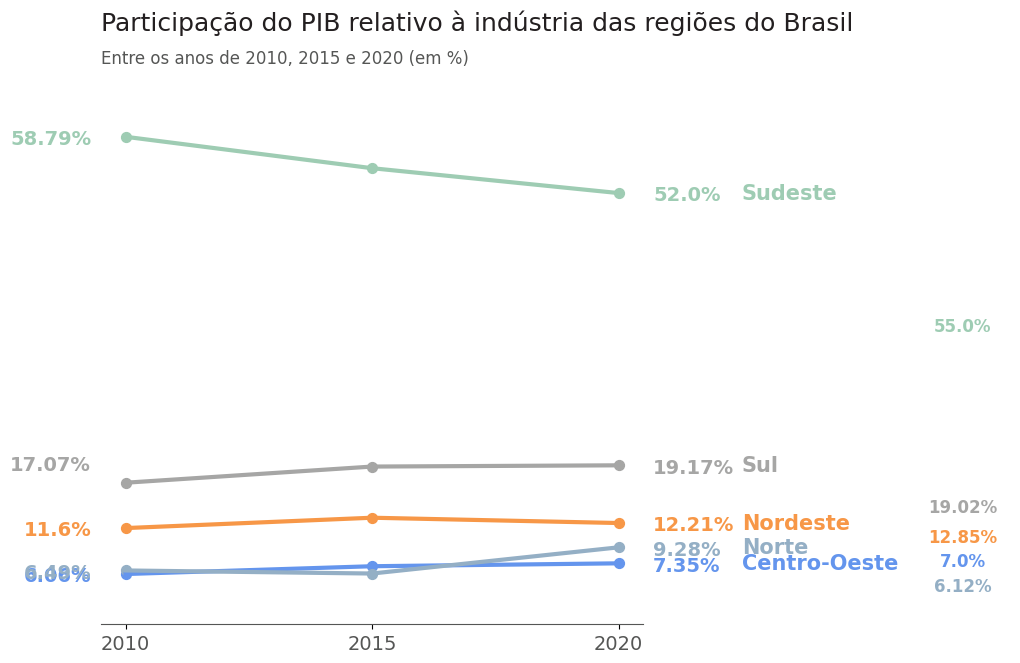

In [ ]:
# Gerando o gráfico de inclinação
ax1, ax2, cores = grafico_slope_pib()

# Retirando os ticks do eixo y de ambos os lados e as bordas exeto a da base
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2010, 2015, 2020], xticklabels = ["2010", "2015", "2020"],
         yticks = df_pib.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 4 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_pib.iloc[0,:])]
         )

# Ajustando as propriedades dos pontos centrais
valores = df_pib.iloc[1,:].values
y_pos = [4, 9, -1, 52,15]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = "bold", fontsize = 12, color = cores[i], ha="center", transform=ax.transData)

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_pib.iloc[2,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_pib.iloc[2,:])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()



#Aula 05
Vamos praticar a criação de gráficos de relacionamento de dados. Para resolver os desafios, vamos seguir utilizando a base de dados com os dados do IDEB (Índice de Desenvolvimento da Educação Básica) entre 2005 a 2021, que está disponível no GitHub do projeto.
Neste desafio, a missão é construir as visualizações que respondam aos seguintes questionamentos:

## Desafio 01
Qual a relação entre as notas das disciplinas de língua portuguesa e matemática do SAEB no Ensino Fundamental Anos Finais no período das 5 últimas avaliações?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ideb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.3 Data Visualization: Gráficos de Composição e Relacionamentos/Dados utilizados/ideb_reg_2005_2021.csv')
ideb.head()

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9


In [ ]:
anos = [2013,2015,2017,2019,2021]
ideb_efaf = ideb.query("ano == @anos and anos_escolares == 'EFAF'")[["ano","nota_saeb_matematica","nota_saeb_lingua_portuguesa"]]
ideb_efaf = ideb_efaf.set_index("ano")
ideb_efaf.head()

,nota_saeb_matematica,nota_saeb_lingua_portuguesa
ano,,
2013,246.08,242.41
2013,291.98,280.08
2013,232.36,229.52
2013,283.20,273.80
2013,235.36,235.19


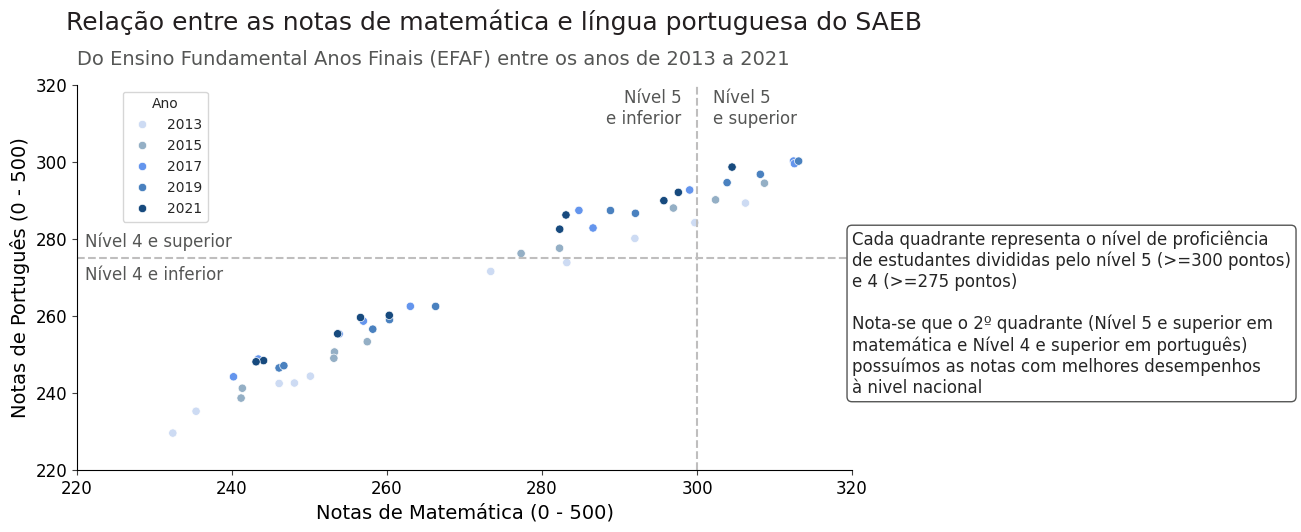

In [ ]:
# Definindo as cores do gráfico
cores = [AZUL6, AZUL5, AZUL3, AZUL2, AZUL1]

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Gerando o gráfico de dispersão com cores como categorias
ax = sns.scatterplot(data = ideb_efaf, x  = "nota_saeb_matematica", y="nota_saeb_lingua_portuguesa", hue = "ano", palette = cores)

## Personalizando o gráfico
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=18, color=CINZA1, ha = 'right', x = 0.97, y = 1.03)
plt.title('Do Ensino Fundamental Anos Finais (EFAF) entre os anos de 2013 a 2021', fontsize=14, color=CINZA3, pad = 15, loc = "left")
ax.legend(bbox_to_anchor=(225, 320), title='Ano', title_fontsize  = 10, fontsize = 10, loc='upper left', bbox_transform=ax.transData)
ax.set_xlabel('Notas de Matemática (0 - 500)',  fontsize = 14)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_xlim(220, 320)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_ylim(220, 320)
sns.despine()

# Limites das notas em no eixo y (notas de português) - 275 pontos (proficiência)
ax.text(ax.get_xlim()[0] + 1, 277, 'Nível 4 e superior', fontsize=12, color = CINZA3, va = "bottom")
ax.text(ax.get_xlim()[0] + 1 , 273, 'Nível 4 e inferior', fontsize=12, color = CINZA3, va = "top")
plt.axhline(y = 275, color = CINZA5, linestyle='--')

# Limites das notas em no eixo x (notas de matemática) - 300 pontos (proficiência)
ax.text(298, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize=12, color = CINZA3, ha="right")
ax.text(302, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize=12, color = CINZA3, ha="left")
plt.axvline(x = 300, color = CINZA5, linestyle='--')

# Adicionando um texto explicando a divisão de quadrantes e o que significa
ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(320, 240), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()


##Desafio 02
Qual seria a relação entre as notas do SAEB no Ensino Médio? Conseguimos notar como as duas se comportam em relação a taxa de aprovação e as regiões?

In [ ]:
ideb.head()

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
0,2005,Centro-Oeste,estadual,fundamental,EFAF,72.1,0.721828,233.50,227.88,4.356453,3.1
1,2005,Centro-Oeste,estadual,fundamental,EFAI,83.0,0.837081,185.38,172.13,4.631618,3.9
2,2005,Centro-Oeste,estadual,medio,EM,68.0,0.695138,261.23,251.52,4.123654,2.9
3,2005,Centro-Oeste,privada,fundamental,EFAF,94.4,0.943491,283.57,266.82,5.840183,5.5
4,2005,Centro-Oeste,privada,fundamental,EFAI,97.3,0.972388,223.64,210.36,6.057024,5.9


In [ ]:
ideb_em = ideb.query("anos_escolares == 'EM'")[["ano","nota_saeb_matematica","nota_saeb_lingua_portuguesa","taxa_aprovacao"]]

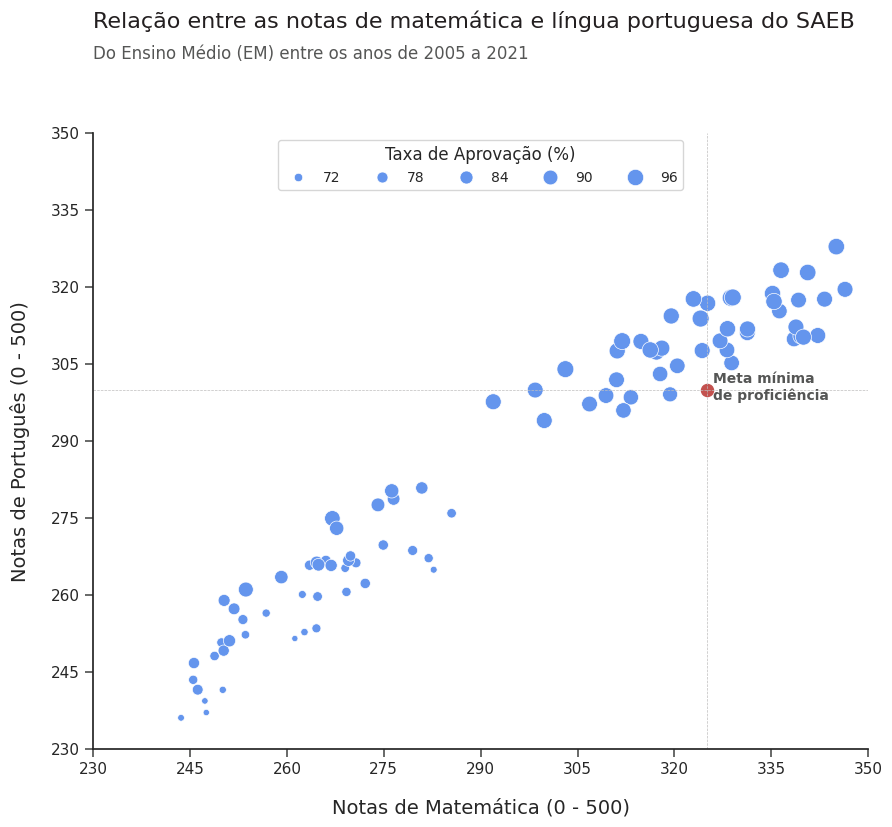

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,8))

# Gerando o gráfico de bolhas
ax = sns.scatterplot(data = ideb_em, x = "nota_saeb_matematica", y = "nota_saeb_lingua_portuguesa",
                     size = "taxa_aprovacao", sizes=(20, 150), color = AZUL3)

# Adicionando a nota meta de proficiência - https://academia.qedu.org.br/prova-brasil/aprendizado-adequado/?repeat=w3tc
ax.scatter([325], [300], color=VERMELHO1, s=75)
plt.axvline(x = 325, color = CINZA5, linestyle='--', linewidth=0.5)
plt.axhline(y = 300, color = CINZA5, linestyle='--', linewidth=0.5)
ax.text(326, 298, 'Meta mínima\nde proficiência', color=CINZA3, fontsize=10, fontweight='bold')

## Personalizando o gráfico
plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size=16,
             color=CINZA1, ha = 'left', x = 0, y = 1.2, transform=ax.transAxes)
plt.title('Do Ensino Médio (EM) entre os anos de 2005 a 2021', fontsize=12,
          color=CINZA3, ha = "left", x = 0, y = 1.12, transform=ax.transAxes)
ax.legend(loc = 'upper center', fontsize = 10, title="Taxa de Aprovação (%)", ncols = 5,
          bbox_transform=ax.transData)
sns.despine()

# Propriedades dos eixos x e y
ax.set_xlim(230, 350)
ax.set_ylim(230, 350)
plt.setp(ax, xticks=np.arange(230, 351, 15), yticks=np.arange(230, 351, 15))

# Ajustando a aparência dos ticks e tick labels
ax.tick_params(bottom=True, left=True)
ax.xaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.yaxis.set_tick_params(labelsize=11, color = CINZA3)
ax.set_xlabel('Notas de Matemática (0 - 500)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Notas de Português (0 - 500)', fontsize = 14, labelpad = 15)

plt.show()
